In [49]:
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import InputLayer, Dense
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense, Dropout


In [2]:
df = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Dataset/wage.csv', sep=";", index_col=False)
df 

,wage,educ,exper,metro
0,2.070000,12,7,1
1,2.120000,12,35,1
2,2.540000,16,20,1
3,2.680000,12,24,1
4,3.090000,13,4,1
...,...,...,...,...
993,35.419998,18,23,1
994,36.840000,16,7,1
995,41.320000,16,11,1
996,47.220001,18,35,1


In [4]:
X = df[['educ', 'exper']]
y = df[['wage']]
X.head()
y.head()

,wage
0,2.07
1,2.12
2,2.54
3,2.68
4,3.09


In [5]:
# Annahme: df ist ein Pandas DataFrame
X_train, y_train = X.iloc[:700], y.iloc[:700, -1]
X_valid, y_valid = X.iloc[700:900], y.iloc[700:900, -1]
X_test, y_test = X.iloc[900:], y.iloc[900:, -1]



In [6]:
print("Der X Test Datensatz besthet aus: ", X_train.shape, "Der Y Test Datensatz besthet aus: ", y_train.shape)
print("Der X_test Datensatz besthet aus: ", X_test.shape,"Der y_test Datensatz besteht  aus: ", y_test.shape)
print("X_train ", type(X_train), "y_train type:", type(y_train), 
      "X_test type:",type(X_test), "X_test type:",type(y_test), 
      "X_val", type(X_valid), "y_val", type(y_valid))

Der X Test Datensatz besthet aus:  (700, 2) Der Y Test Datensatz besthet aus:  (700,)
Der X_test Datensatz besthet aus:  (98, 2) Der y_test Datensatz besteht  aus:  (98,)
X_train  <class 'pandas.core.frame.DataFrame'> y_train type: <class 'pandas.core.series.Series'> X_test type: <class 'pandas.core.frame.DataFrame'> X_test type: <class 'pandas.core.series.Series'> X_val <class 'pandas.core.frame.DataFrame'> y_val <class 'pandas.core.series.Series'>


In [7]:
y_pred = X_valid.iloc[:, -1].values
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

158.0

# Model 1 

In [18]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from keras.optimizers import Adam

model = Sequential([
    InputLayer(input_shape=X_train.shape[-1], name="Input"),
    Dense(20, activation="sigmoid", name="layer1"),
    Dense(30, name="layer2"),
    Dense(40, name="layer3"),
    Dense(1, name="Output"),
])

optimizer = Adam(learning_rate=0.005)  # Default learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer)  # Using MSE for loss and MAE for metrics
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 20)                60        
                                                                 
 layer2 (Dense)              (None, 30)                630       
                                                                 
 layer3 (Dense)              (None, 40)                1240      
                                                                 
 Output (Dense)              (None, 1)                 41        
                                                                 
Total params: 1,971
Trainable params: 1,971
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Beispiel für das Modelltraining
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/30
22/22 [==============================] - 0s 4ms/step - loss: 13.2879 - val_loss: 75.1991
Epoch 2/30
22/22 [==============================] - 0s 2ms/step - loss: 6.4660 - val_loss: 58.0598
Epoch 3/30
22/22 [==============================] - 0s 1ms/step - loss: 5.9199 - val_loss: 63.0609
Epoch 4/30
22/22 [==============================] - 0s 1ms/step - loss: 5.9827 - val_loss: 53.0061
Epoch 5/30
22/22 [==============================] - 0s 1ms/step - loss: 5.8211 - val_loss: 49.2947
Epoch 6/30
22/22 [==============================] - 0s 1ms/step - loss: 5.8150 - val_loss: 51.6705
Epoch 7/30
22/22 [==============================] - 0s 1ms/step - loss: 5.7314 - val_loss: 52.6352
Epoch 8/30
22/22 [==============================] - 0s 1ms/step - loss: 5.6372 - val_loss: 44.4297
Epoch 9/30
22/22 [==============================] - 0s 1ms/step - loss: 5.7526 - val_loss: 46.0861
Epoch 10/30
22/22 [==============================] - 0s 1ms/step - loss: 5.5818 - val_loss: 54.5387
Epoch 11

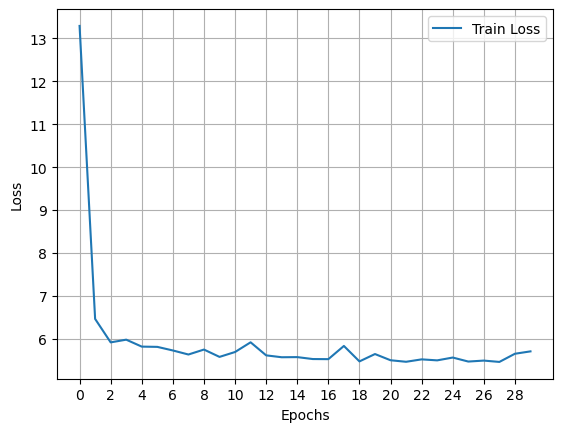

In [41]:
def create_plt_loss(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['loss'], label='Train Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

create_plt_loss(history, x_tick_min = 0, 
                x_tick_max =  30, x_tick_step=2)

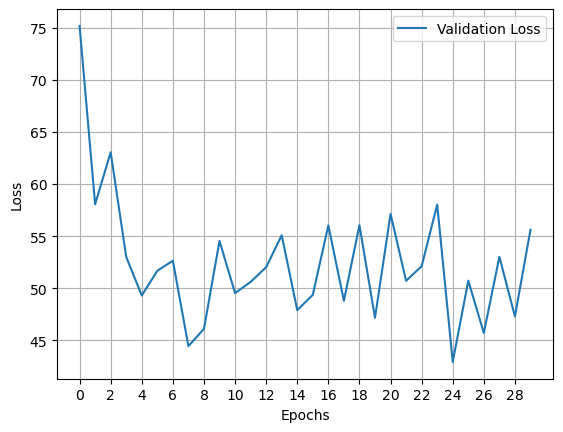

In [67]:
def create_plt_val_los(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

    
create_plt_val_los(history, x_tick_min = 0,x_tick_max=30, x_tick_step=2)

In [44]:
# Beispiel für die Modellbewertung
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


4/4 [==============================] - 0s 5ms/step - loss: 319.1094
Test Loss: 319.1094055175781


In [45]:
predictions = model.predict(X_test)
predictions.shape

4/4 [==============================] - 0s 550us/step


(98, 1)

In [46]:
y_test.shape, predictions.shape

((98,), (98, 1))

In [47]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions.flatten()
})
results_df

,True Values,Predicted Values
0,18.230000,7.737133
1,18.270000,7.139068
2,18.330000,6.463645
3,18.389999,6.658182
4,18.420000,7.936142
...,...,...
93,35.419998,7.925593
94,36.840000,7.561083
95,41.320000,7.549229
96,47.220001,7.826093


# Ende Model 1

# Model 2 

2 Model:

In [59]:
# Model infrastructure

model_2 = Sequential()
model_2.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model_2.add(LSTM(units=50, return_sequences=False, activation = "sigmoid"))
model_2.add(Dense(units=1))
    

2024-03-03 21:08:18.949844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-03 21:08:18.950467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-03 21:08:18.952488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 50)             10400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='adam', loss='mean_squared_error')     
model_2.summary() 

In [74]:
history_2 = model_2.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_valid, y_valid))
history_2

Epoch 1/20
690/700 [============================>.] - ETA: 0s - loss: 5.5473

2024-03-03 21:14:13.227027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-03 21:14:13.227463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-03 21:14:13.228167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

700/700 [==============================] - 1s 1ms/step - loss: 5.5301 - val_loss: 51.0845
Epoch 2/20
700/700 [==============================] - 1s 996us/step - loss: 5.5226 - val_loss: 50.1922
Epoch 3/20
700/700 [==============================] - 1s 980us/step - loss: 5.5728 - val_loss: 52.3755
Epoch 4/20
700/700 [==============================] - 1s 975us/step - loss: 5.5716 - val_loss: 56.0640
Epoch 5/20
700/700 [==============================] - 1s 1ms/step - loss: 5.4932 - val_loss: 48.7217
Epoch 6/20
700/700 [==============================] - 1s 978us/step - loss: 5.5286 - val_loss: 48.3456
Epoch 7/20
700/700 [==============================] - 1s 981us/step - loss: 5.4521 - val_loss: 51.5617
Epoch 8/20
700/700 [==============================] - 1s 1ms/step - loss: 5.4737 - val_loss: 50.7799
Epoch 9/20
700/700 [==============================] - 1s 1ms/step - loss: 5.4783 - val_loss: 52.3258
Epoch 10/20
700/700 [==============================] - 1s 967us/step - loss: 5.5227 - val_lo

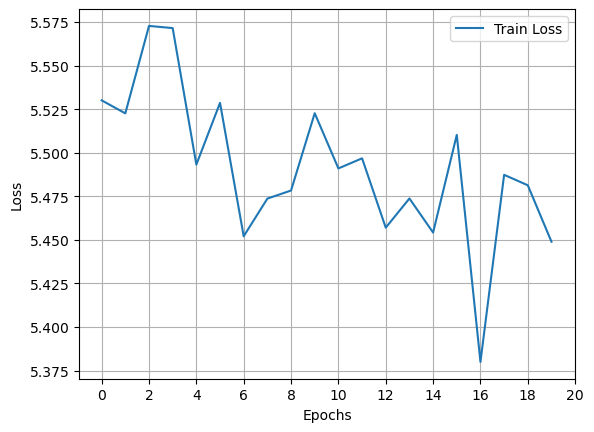

In [78]:
create_plt_loss(history_2, x_tick_min = 0,x_tick_max=22, x_tick_step=2)

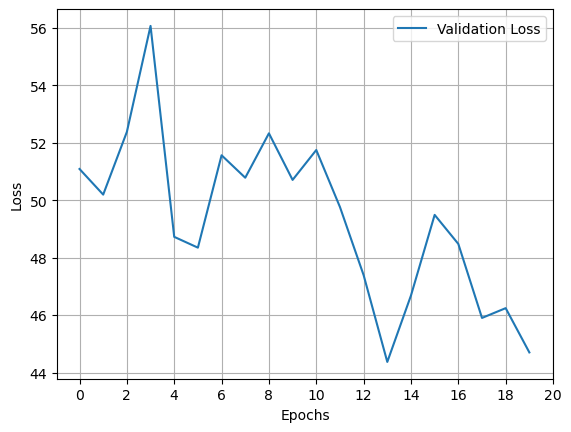

In [79]:
create_plt_val_los(history_2, x_tick_min = 0,x_tick_max=22, x_tick_step=2)  

In [81]:
test_loss_2 = model_2.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)

4/4 [==============================] - 0s 2ms/step - loss: 295.5969
Test Loss of Model 1: 319.1094055175781
Test Loss of Model 2: 295.596923828125


In [82]:
predictions_2 = model_2.predict(X_test)
predictions_2.shape

4/4 [==============================] - 0s 865us/step


2024-03-03 21:21:01.434883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-03 21:21:01.435315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-03 21:21:01.435770: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

(98, 1)

In [83]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df_2 = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions_2.flatten()
})
results_df_2

,True Values,Predicted Values
0,18.230000,8.334155
1,18.270000,8.219435
2,18.330000,7.633757
3,18.389999,7.680062
4,18.420000,8.397002
...,...,...
93,35.419998,8.418233
94,36.840000,8.346364
95,41.320000,8.388777
96,47.220001,8.339531


<Axes: >

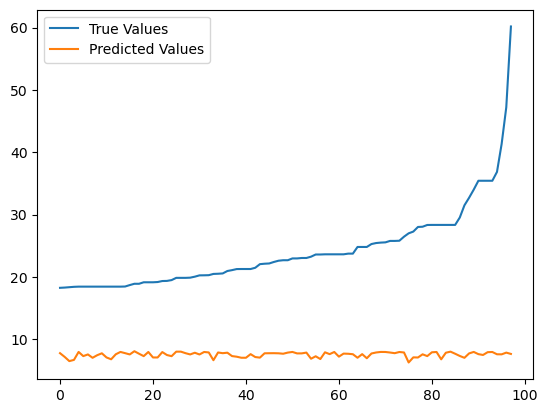

In [85]:
results_df.plot()